In [1]:
import pandas as pd
pd.options.display.max_columns=200
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import warnings 
warnings.filterwarnings('ignore')
from sklearn.dummy import DummyRegressor

In [2]:
data = pd.read_csv('2016_Building_Energy_Benchmarking.csv')

In [3]:
data

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,7,DOWNTOWN,47.61220,-122.33799,1927,1.0,12,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,60.0,81.699997,84.300003,182.500000,189.000000,7.226362e+06,7.456910e+06,2003882.00,1.156514e+06,3.946027e+06,12764.529300,1.276453e+06,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,7,DOWNTOWN,47.61317,-122.33393,1996,1.0,11,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,61.0,94.800003,97.900002,176.100006,179.399994,8.387933e+06,8.664479e+06,0.00,9.504252e+05,3.242851e+06,51450.816410,5.145082e+06,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,7,DOWNTOWN,47.61393,-122.33810,1969,1.0,41,956110,196718,759392,Hotel,Hotel,756493.0,NaN,NaN,NaN,NaN,NaN,43.0,96.000000,97.699997,241.899994,244.100006,7.258702e+07,7.393711e+07,21566554.00,1.451544e+07,4.952666e+07,14938.000000,1.493800e+06,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,7,DOWNTOWN,47.61412,-122.33664,1926,1.0,10,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,NaN,NaN,NaN,56.0,110.800003,113.300003,216.199997,224.000000,6.794584e+06,6.946800e+06,2214446.25,8.115253e+05,2.768924e+06,18112.130860,1.811213e+06,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,7,DOWNTOWN,47.61375,-122.34047,1980,1.0,18,175580,62000,113580,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,NaN,75.0,114.800003,118.699997,211.399994,215.600006,1.417261e+07,1.465650e+07,0.00,1.573449e+06,5.368607e+06,88039.984380,8.803998e+06,False,NaN,Compliant,NaN,505.01,2.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,50222,2016,Nonresidential COS,Office,Horticulture building,1600 S Dakota St,Seattle,WA,NaN,1624049080,2,GREATER DUWAMISH,47.56722,-122.31154,1990,1.0,1,12294,0,12294,Office,Office,12294.0,NaN,NaN,NaN,NaN,NaN,46.0,69.099998,76.699997,161.699997,176.100006,8.497457e+05,9.430032e+05,0.00,1.536550e+05,5.242709e+05,3254.750244,3.254750e+05,True,NaN,Error - Correct Default Data,NaN,20.94,1.70
3372,50223,2016,Nonresidential COS,Other,International district/Chinatown CC,719 8th Ave S,Seattle,WA,NaN,3558300000,2,DOWNTOWN,47.59625,-122.32283,2004,1.0,1,16000,0,16000,Other - Recreation,Other - Recreation,16000.0,NaN,NaN,NaN,NaN,NaN,NaN,59.400002,65.900002,114.199997,118.900001,9.502762e+05,1.053706e+06,0.00,1.162210e+05,3.965461e+05,5537.299805,5.537300e+05,False,NaN,Compliant,NaN,32.17,2.01
3373,50224,2016,Nonresidential COS,Other,Queen Anne Pool,1920 1st Ave W,Seattle,WA,NaN,1794501150,7,MAGNOLIA / QUEEN ANNE,47.63644,-122.35784,1974,1.0,1,13157,0,13157,"Fitness Center/Health Club/Gym, Other - Recrea...",Other - Recreation,7583.0,Fitness Center/Health Club/Gym,5574.0,Swimmin

In [4]:
data.set_index('OSEBuildingID', inplace = True)

In [5]:
data['BuildingType'].value_counts(dropna=False)

NonResidential          1460
Multifamily LR (1-4)    1018
Multifamily MR (5-9)     580
Multifamily HR (10+)     110
SPS-District K-12         98
Nonresidential COS        85
Campus                    24
Nonresidential WA          1
Name: BuildingType, dtype: int64

In [6]:
df=data.copy()

In [7]:
df.drop(labels=df.loc[df['BuildingType'].str.startswith("Multifamily")].index, axis = 0, inplace = True)

In [8]:
df['Age']=df['DataYear']-df['YearBuilt']

In [9]:
df['PropertyGFAParking(%)']=df['PropertyGFAParking']/df['PropertyGFATotal']*100
df['PropertyGFABuilding(s)(%)']=df['PropertyGFABuilding(s)']/df['PropertyGFATotal']*100

In [10]:
df.loc[df['SiteEnergyUse(kBtu)']==0]

,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity,Age,PropertyGFAParking(%),PropertyGFABuilding(s)(%)
OSEBuildingID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
34,2016,SPS-District K-12,K-12 School,Meany Building,301/300 21st Ave. E.,Seattle,WA,98112.0,0688000090,3,Central,47.62266,-122.30547,1955,1.0,1,126351,0,126351,K-12 School,K-12 School,126351.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.000000,0.0,False,NaN,Missing Data,NaN,0.00,0.00,61,0.0,100.0
37,2016,SPS-District K-12,K-12 School,John Hay Elementary,201 Garfield St.,Seattle,WA,98109.0,0809000005,7,MAGNOLIA / QUEEN ANNE,47.63290,-122.35172,1989,1.0,2,51582,0,51582,K-12 School,K-12 School,55166.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,438691.6875,1496816.0,0.000000,0.0,False,NaN,Missing Data,NaN,10.43,0.20,27,0.0,100.0
87,2016,SPS-District K-12,K-12 School,Arbor Heights Elementary,3701 S.W. 104th St.,Seattle,WA,98146.0,2518400005,1,SOUTHWEST,47.50970,-122.37759,1948,1.0,2,53352,0,53352,K-12 School,K-12 School,65568.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,176088.0938,600813.0,0.000000,0.0,False,NaN,Missing Data,NaN,4.19,0.08,68,0.0,100.0
118,2016,SPS-District K-12,K-12 School,Pathfinder K-8,1901 SW Genesee St.,Seattle,WA,98106.0,1324039116,1,DELRIDGE,47.56360,-122.35800,1999,1.0,3,74468,0,74468,K-12 School,K-12 School,75364.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,497706.8125,1698176.0,0.000000,0.0,False,NaN,Missing Data,NaN,11.84,0.16,17,0.0,100.0
122,2016,SPS-District K-12,K-12 School,John Muir Elementary,3301 S. Horton St.,Seattle,WA,98144.0,1524049002,2,SOUTHEAST,47.57324,-122.29058,1991,1.0,2,58933,0,58933,K-12 School,K-12 School,60725.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,687906.8750,2347138.0,0.000000,0.0,False,NaN,Missing Data,NaN,16.36,0.28,25,0.0,100.0
140,2016,SPS-District K-12,K-12 School,B.F. Day Elementary,3921 Linden Ave. N.,Seattle,WA,98103.0,1931301145,6,LAKE UNION,47.65464,-122.34912,1991,1.0,3,66588,0,66588,K-12 School,K-12 School,66588.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,616730.8125,2104286.0,0.000000,0.0,False,NaN,Missing Data,NaN,14.67,0.22,25,0.0,100.0
217,2016,SPS-District K-12,K-12 School,Whitman Middle,9201 15th Ave. NW.,Seattle,WA,98117.0,3526039131,6,BALLARD,47.69675,-122.37760,1959,1.0,1,160270,0,160270,K-12 School,K-12 School,160270.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,43189.171880,4318917.0,False,NaN,Missing Data,NaN,229.38,1.43,57,0.0,100.0
227,2016,SPS-District K-12,K-12 School,Washington Middle,2101 S. Jackson,Seattle,WA,98144.0,3646100540,3,CENTRAL,47.59796,-122.30415,1963,1.0,3,136188,0,136188,K-12 School,K-12 School,136188.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,32178.773440,3217877.0,False,NaN,Missing Data,NaN,170.90,1.25,53,0.0,100.0
242,2016,SPS-District K-12,K-12 School,Olympic View Elementary,504 N.E. 95th St.,Seattle,WA,98115.0,5100404840,5,NORTH,47.69823,-122.32126,1989,1.0,2,52792,0,52792,K-12 School,K-12 School,55480.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.000000,0.0,False,NaN,Missing Data,NaN,0.00,0.00,27,0.0,100.0


In [11]:
df.drop(labels = df.loc[df['Electricity(kBtu)']<0].index, axis = 0, inplace = True)

In [12]:
for c in df.loc[df['SiteEnergyUse(kBtu)']==0]:
    df['SteamUse(%)']=df['SteamUse(kBtu)']/df['SiteEnergyUse(kBtu)']*100
    df['Electricity(%)']=df['Electricity(kBtu)']/df['SiteEnergyUse(kBtu)']*100
    df['NaturalGas(%)']=df['NaturalGas(kBtu)']/df['SiteEnergyUse(kBtu)']*100

In [13]:
df.drop(labels=df.loc[~df['Outlier'].isnull()].index, axis = 0, inplace = True)

In [14]:
basket = ['DataYear','BuildingType','PropertyName','Address','City','State','ZipCode','TaxParcelIdentificationNumber',
         'Neighborhood','Latitude','Longitude','ListOfAllPropertyUseTypes','LargestPropertyUseType','SecondLargestPropertyUseType','SecondLargestPropertyUseTypeGFA',
         'ThirdLargestPropertyUseType','ThirdLargestPropertyUseTypeGFA','YearsENERGYSTARCertified','Electricity(kWh)',
         'NaturalGas(therms)','Comments','DefaultData','ComplianceStatus','Outlier','SteamUse(kBtu)','Electricity(kBtu)','NaturalGas(kBtu)',
         'YearBuilt','PropertyGFAParking','PropertyGFABuilding(s)']
df.drop(labels=basket , axis = 1, inplace = True)

In [15]:
df

,PrimaryPropertyType,CouncilDistrictCode,NumberofBuildings,NumberofFloors,PropertyGFATotal,LargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,Age,PropertyGFAParking(%),PropertyGFABuilding(s)(%),SteamUse(%),Electricity(%),NaturalGas(%)
OSEBuildingID,,,,,,,,,,,,,,,,,,,,,
1,Hotel,7,1.0,12,88434,88434.0,60.0,81.699997,84.300003,182.500000,189.000000,7.226362e+06,7.456910e+06,249.98,2.83,89,0.000000,100.000000,27.730162,54.605993,17.663838
2,Hotel,7,1.0,11,103566,83880.0,61.0,94.800003,97.900002,176.100006,179.399994,8.387933e+06,8.664479e+06,295.86,2.86,20,14.545314,85.454686,0.000000,38.660907,61.339093
3,Hotel,7,1.0,41,956110,756493.0,43.0,96.000000,97.699997,241.899994,244.100006,7.258702e+07,7.393711e+07,2089.28,2.19,47,20.574829,79.425171,29.711308,68.230741,2.057944
5,Hotel,7,1.0,10,61320,61320.0,56.0,110.800003,113.300003,216.199997,224.000000,6.794584e+06,6.946800e+06,286.43,4.67,90,0.000000,100.000000,32.591344,40.751928,26.656717
8,Hotel,7,1.0,18,175580,123445.0,75.0,114.800003,118.699997,211.399994,215.600006,1.417261e+07,1.465650e+07,505.01,2.88,36,35.311539,64.688461,0.000000,37.880168,62.119825
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50222,Office,2,1.0,1,12294,12294.0,46.0,69.099998,76.699997,161.699997,176.100006,8.497457e+05,9.430032e+05,20.94,1.70,26,0.000000,100.000000,0.000000,61.697384,38.302639
50223,Other,2,1.0,1,16000,16000.0,NaN,59.400002,65.900002,114.199997,118.900001,9.502762e+05,1.053706e+06,32.17,2.01,12,0.000000,100.000000,0.000000,41.729558,58.270426
50224,Other,7,1.0,1,13157,7583.0,NaN,438.200012,460.100006,744.799988,767.799988,5.765898e+06,6.053764e+06,223.54,16.99,42,0.000000,100.000000,0.000000,31.082041,68.917956


In [16]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)

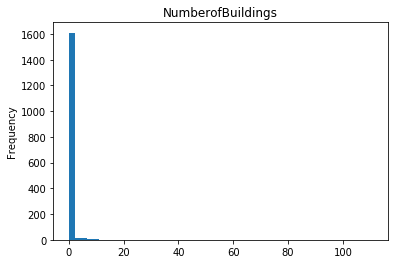

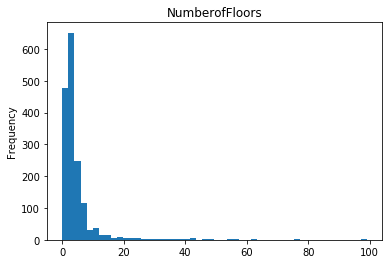

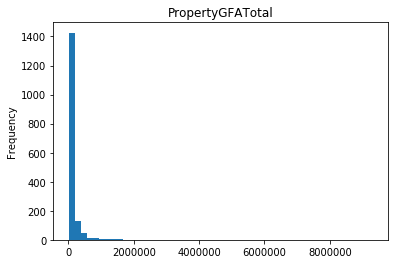

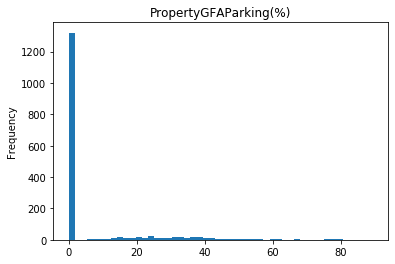

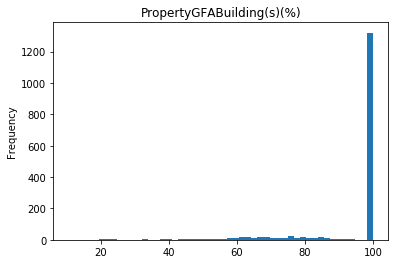

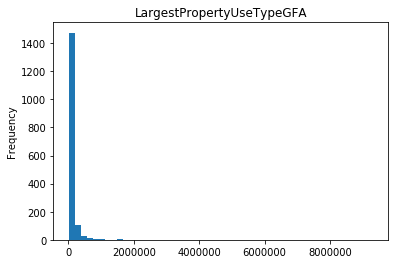

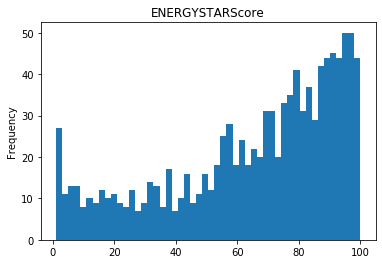

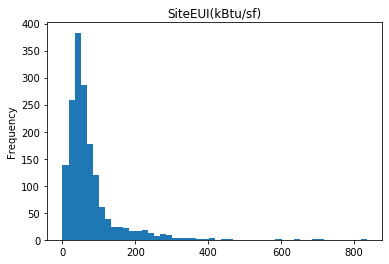

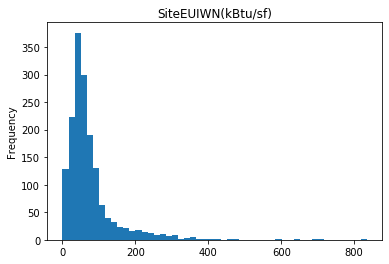

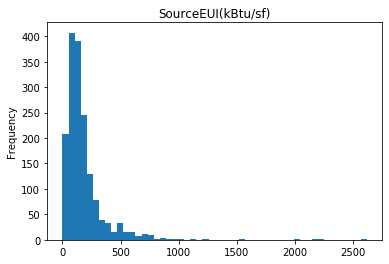

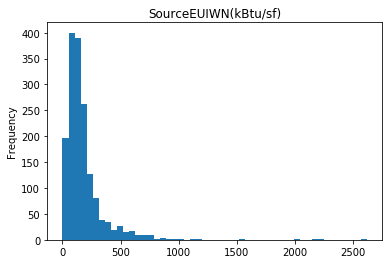

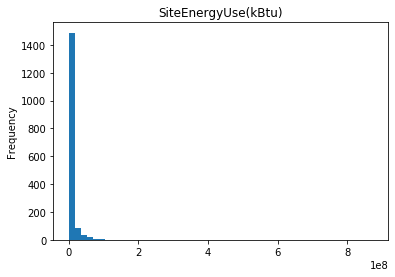

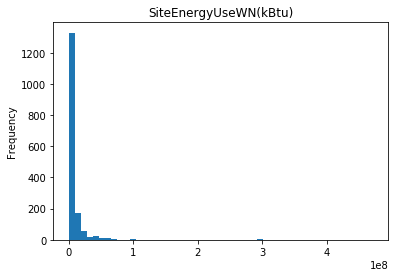

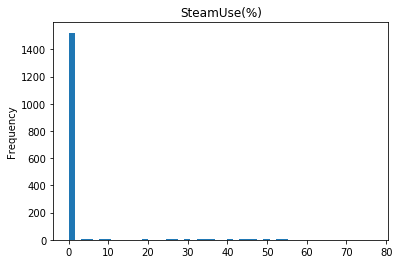

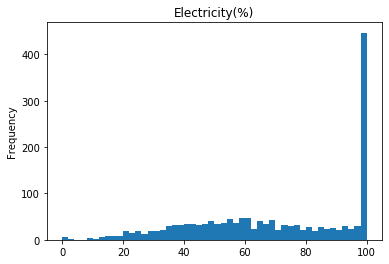

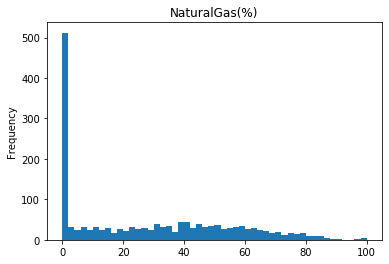

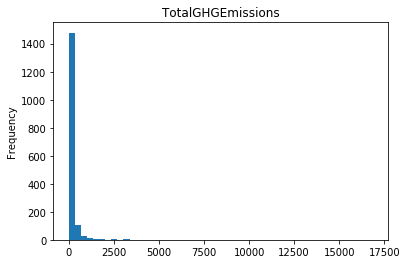

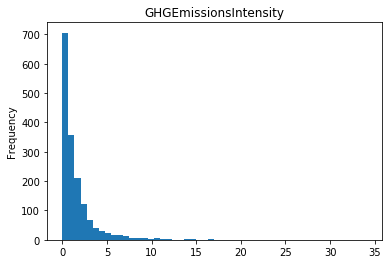

In [17]:
cols = ['NumberofBuildings','NumberofFloors','PropertyGFATotal','PropertyGFAParking(%)',
        'PropertyGFABuilding(s)(%)','LargestPropertyUseTypeGFA','ENERGYSTARScore','SiteEUI(kBtu/sf)',
        'SiteEUIWN(kBtu/sf)','SourceEUI(kBtu/sf)','SourceEUIWN(kBtu/sf)','SiteEnergyUse(kBtu)',
        'SiteEnergyUseWN(kBtu)','SteamUse(%)','Electricity(%)','NaturalGas(%)','TotalGHGEmissions',
        'GHGEmissionsIntensity']

for col in cols:
   df[col].dropna().plot.hist(bins=50, logx=False)
   plt.title(col)
   plt.show()

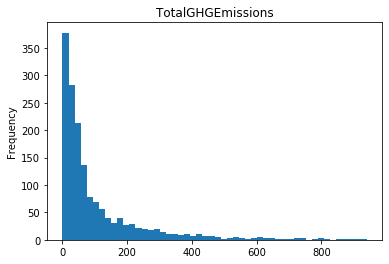

In [18]:
df[df['TotalGHGEmissions']<1000]['TotalGHGEmissions'].dropna().plot.hist(bins=50, logx=False)
plt.title('TotalGHGEmissions')
plt.show()

In [19]:
df.loc[df['TotalGHGEmissions']==0]

,PrimaryPropertyType,CouncilDistrictCode,NumberofBuildings,NumberofFloors,PropertyGFATotal,LargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,Age,PropertyGFAParking(%),PropertyGFABuilding(s)(%),SteamUse(%),Electricity(%),NaturalGas(%)
OSEBuildingID,,,,,,,,,,,,,,,,,,,,,
34,K-12 School,3,1.0,1,126351,126351.0,NaN,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,61,0.0,100.0,NaN,NaN,NaN
242,K-12 School,5,1.0,2,52792,55480.0,NaN,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,27,0.0,100.0,NaN,NaN,NaN
435,Other,7,1.0,6,1400000,1072000.0,NaN,NaN,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,26,0.0,100.0,NaN,NaN,NaN
700,Supermarket / Grocery Store,7,1.0,1,57176,39500.0,31.0,208.800003,214.100006,0.0,0.0,12525174.0,12843856.0,0.0,0.0,8,0.0,100.0,0.0,0.0,0.0
19776,Other,5,1.0,1,29924,29924.0,NaN,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,14,0.0,100.0,NaN,NaN,NaN
21616,K-12 School,5,1.0,1,42292,43188.0,100.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,62,0.0,100.0,NaN,NaN,NaN


In [20]:
df['PrimaryPropertyType'].value_counts()

Small- and Mid-Sized Office    288
Other                          247
Warehouse                      187
Large Office                   170
K-12 School                    137
Mixed Use Property             114
Retail Store                    89
Hotel                           75
Worship Facility                69
Distribution Center             53
Supermarket / Grocery Store     40
Medical Office                  39
Self-Storage Facility           28
University                      24
Residence Hall                  21
Senior Care Community           20
Restaurant                      12
Refrigerated Warehouse          12
Laboratory                      10
Hospital                        10
Office                           3
Low-Rise Multifamily             2
Name: PrimaryPropertyType, dtype: int64

In [21]:
df.loc[df['PrimaryPropertyType']=='Residence Hall', 'PrimaryPropertyType'] = 'Other'
df.loc[df['PrimaryPropertyType']=='Senior Care Community', 'PrimaryPropertyType'] = 'Other'
df.loc[df['PrimaryPropertyType']=='Refrigerated Warehouse', 'PrimaryPropertyType'] = 'Other'
df.loc[df['PrimaryPropertyType']=='Restaurant', 'PrimaryPropertyType'] = 'Other'
df.loc[df['PrimaryPropertyType']=='Hospital', 'PrimaryPropertyType'] = 'Other'
df.loc[df['PrimaryPropertyType']=='Laboratory', 'PrimaryPropertyType'] = 'Other'
df.loc[df['PrimaryPropertyType']=='Office', 'PrimaryPropertyType'] = 'Other'
df.drop(df.loc[df['PrimaryPropertyType']=='Low-Rise Multifamily'].index, axis = 0, inplace = True)

In [22]:
df['PrimaryPropertyType'].value_counts()

Other                          335
Small- and Mid-Sized Office    288
Warehouse                      187
Large Office                   170
K-12 School                    137
Mixed Use Property             114
Retail Store                    89
Hotel                           75
Worship Facility                69
Distribution Center             53
Supermarket / Grocery Store     40
Medical Office                  39
Self-Storage Facility           28
University                      24
Name: PrimaryPropertyType, dtype: int64

In [23]:
df = pd.get_dummies(df, columns = ['PrimaryPropertyType'])

In [24]:
df = pd.get_dummies(df, columns = ['CouncilDistrictCode'])

In [25]:
df

,NumberofBuildings,NumberofFloors,PropertyGFATotal,LargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,Age,PropertyGFAParking(%),PropertyGFABuilding(s)(%),SteamUse(%),Electricity(%),NaturalGas(%),PrimaryPropertyType_Distribution Center,PrimaryPropertyType_Hotel,PrimaryPropertyType_K-12 School,PrimaryPropertyType_Large Office,PrimaryPropertyType_Medical Office,PrimaryPropertyType_Mixed Use Property,PrimaryPropertyType_Other,PrimaryPropertyType_Retail Store,PrimaryPropertyType_Self-Storage Facility,PrimaryPropertyType_Small- and Mid-Sized Office,PrimaryPropertyType_Supermarket / Grocery Store,PrimaryPropertyType_University,PrimaryPropertyType_Warehouse,PrimaryPropertyType_Worship Facility,CouncilDistrictCode_1,CouncilDistrictCode_2,CouncilDistrictCode_3,CouncilDistrictCode_4,CouncilDistrictCode_5,CouncilDistrictCode_6,CouncilDistrictCode_7
OSEBuildingID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1.0,12,88434,88434.0,60.0,81.699997,84.300003,182.500000,189.000000,7.226362e+06,7.456910e+06,249.98,2.83,89,0.000000,100.000000,27.730162,54.605993,17.663838,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,1.0,11,103566,83880.0,61.0,94.800003,97.900002,176.100006,179.399994,8.387933e+06,8.664479e+06,295.86,2.86,20,14.545314,85.454686,0.000000,38.660907,61.339093,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,1.0,41,956110,756493.0,43.0,96.000000,97.699997,241.899994,244.100006,7.258702e+07,7.393711e+07,2089.28,2.19,47,20.574829,79.425171,29.711308,68.230741,2.057944,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5,1.0,10,61320,61320.0,56.0,110.800003,113.300003,216.199997,224.000000,6.794584e+06,6.946800e+06,286.43,4.67,90,0.000000,100.000000,32.591344,40.751928,26.656717,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
8,1.0,18,175580,123445.0,75.0,114.800003,118.699997,211.399994,215.600006,1.417261e+07,1.465650e+07,505.01,2.88,36,35.311539,64.688461,0.000000,37.880168,62.119825,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50222,1.0,1,12294,12294.0,46.0,69.099998,76.699997,161.699997,176.100006,8.497457e+05,9.430032e+05,20.94,1.70,26,0.000000,100.000000,0.000000,61.697384,38.302639,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
50223,1.0,1,16000,16000.0,NaN,59.400002,65.900002,114.199997,118.900001,9.502762e+05,1.053706e+06,32.17,2.01,12,0.000000,100.000000,0.000000,41.729558,58.270426,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
50224,1.0,1,13157,7583.0,NaN,438.200012,460.100006,744.799988,767.799988,5.765898e+06,6.053764e+06,223.54,16.99,42,0.000000,100.000000,0.000000,31.082041,68.917956,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [26]:
df.loc[df['ENERGYSTARScore'].isnull(),'ENERGYSTARScore']=0

In [27]:
df.insert(loc = 5, column = 'EnergyStarNaN', value = np.where(df['ENERGYSTARScore']!=0, 0, 1))

In [28]:
df

,NumberofBuildings,NumberofFloors,PropertyGFATotal,LargestPropertyUseTypeGFA,ENERGYSTARScore,EnergyStarNaN,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,Age,PropertyGFAParking(%),PropertyGFABuilding(s)(%),SteamUse(%),Electricity(%),NaturalGas(%),PrimaryPropertyType_Distribution Center,PrimaryPropertyType_Hotel,PrimaryPropertyType_K-12 School,PrimaryPropertyType_Large Office,PrimaryPropertyType_Medical Office,PrimaryPropertyType_Mixed Use Property,PrimaryPropertyType_Other,PrimaryPropertyType_Retail Store,PrimaryPropertyType_Self-Storage Facility,PrimaryPropertyType_Small- and Mid-Sized Office,PrimaryPropertyType_Supermarket / Grocery Store,PrimaryPropertyType_University,PrimaryPropertyType_Warehouse,PrimaryPropertyType_Worship Facility,CouncilDistrictCode_1,CouncilDistrictCode_2,CouncilDistrictCode_3,CouncilDistrictCode_4,CouncilDistrictCode_5,CouncilDistrictCode_6,CouncilDistrictCode_7
OSEBuildingID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1.0,12,88434,88434.0,60.0,0,81.699997,84.300003,182.500000,189.000000,7.226362e+06,7.456910e+06,249.98,2.83,89,0.000000,100.000000,27.730162,54.605993,17.663838,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,1.0,11,103566,83880.0,61.0,0,94.800003,97.900002,176.100006,179.399994,8.387933e+06,8.664479e+06,295.86,2.86,20,14.545314,85.454686,0.000000,38.660907,61.339093,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,1.0,41,956110,756493.0,43.0,0,96.000000,97.699997,241.899994,244.100006,7.258702e+07,7.393711e+07,2089.28,2.19,47,20.574829,79.425171,29.711308,68.230741,2.057944,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5,1.0,10,61320,61320.0,56.0,0,110.800003,113.300003,216.199997,224.000000,6.794584e+06,6.946800e+06,286.43,4.67,90,0.000000,100.000000,32.591344,40.751928,26.656717,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
8,1.0,18,175580,123445.0,75.0,0,114.800003,118.699997,211.399994,215.600006,1.417261e+07,1.465650e+07,505.01,2.88,36,35.311539,64.688461,0.000000,37.880168,62.119825,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50222,1.0,1,12294,12294.0,46.0,0,69.099998,76.699997,161.699997,176.100006,8.497457e+05,9.430032e+05,20.94,1.70,26,0.000000,100.000000,0.000000,61.697384,38.302639,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
50223,1.0,1,16000,16000.0,0.0,1,59.400002,65.900002,114.199997,118.900001,9.502762e+05,1.053706e+06,32.17,2.01,12,0.000000,100.000000,0.000000,41.729558,58.270426,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
50224,1.0,1,13157,7583.0,0.0,1,438.200012,460.100006,744.799988,767.799988,5.765898e+06,6.053764e+06,223.54,16.99,42,0.000000,100.000000,0.000000,31.082041,68.917956,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1


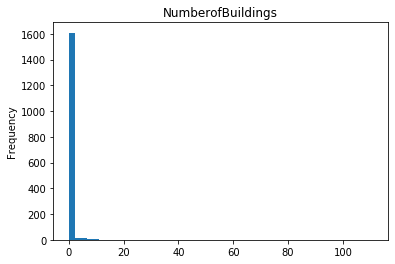

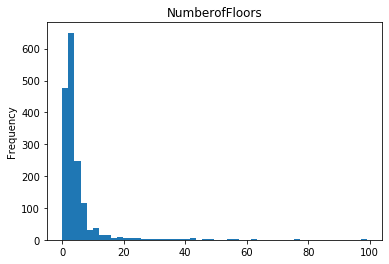

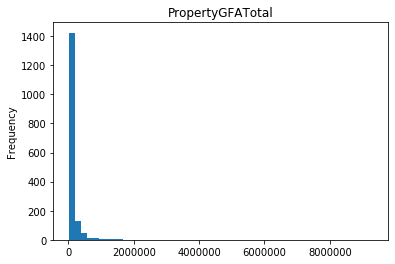

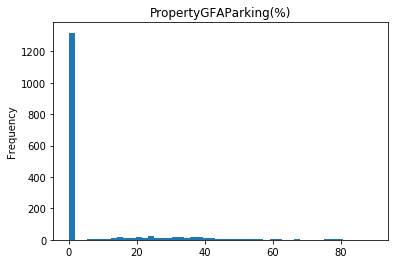

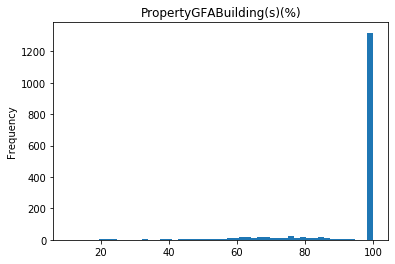

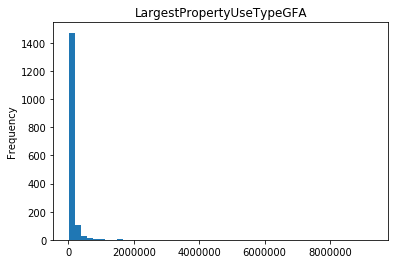

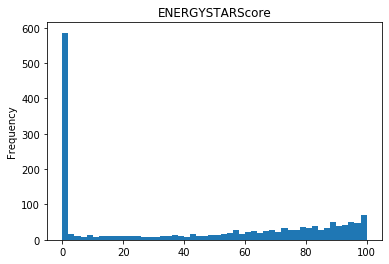

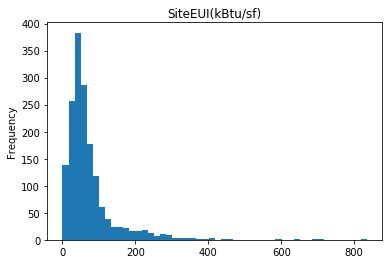

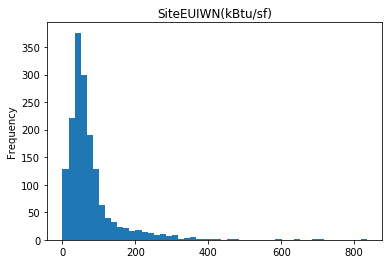

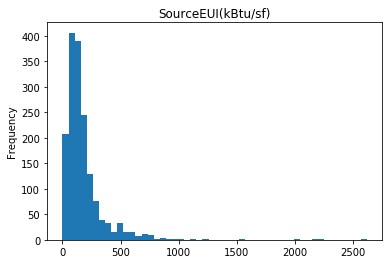

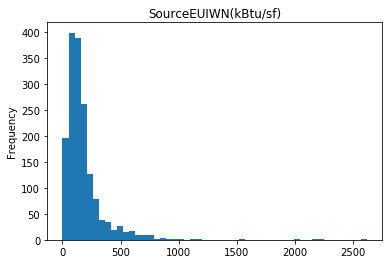

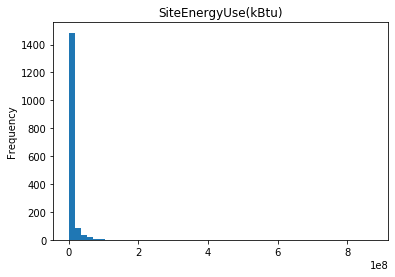

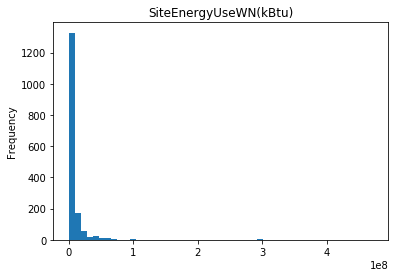

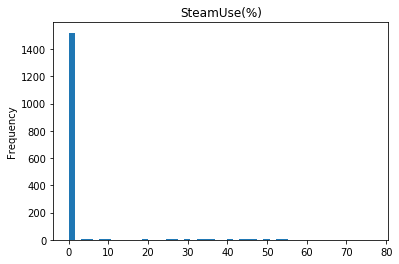

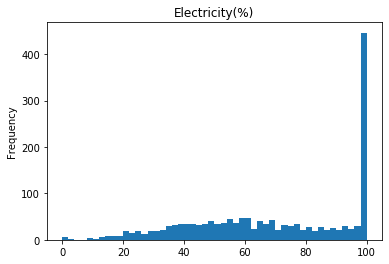

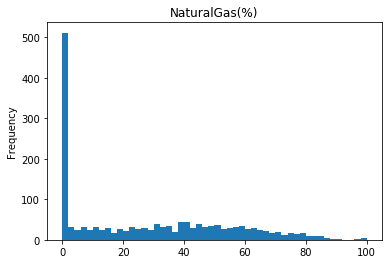

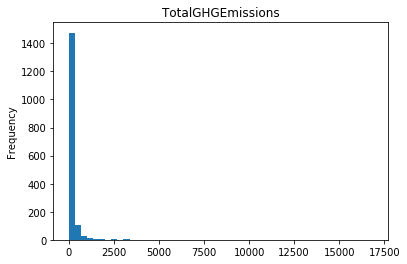

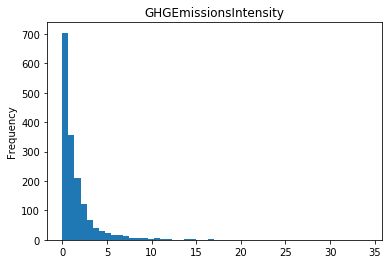

In [29]:
for col in cols:
   df[col].dropna().plot.hist(bins=50, logx=False)
   plt.title(col)
   plt.show()

In [30]:
df.loc[df['TotalGHGEmissions']>5000]

,NumberofBuildings,NumberofFloors,PropertyGFATotal,LargestPropertyUseTypeGFA,ENERGYSTARScore,EnergyStarNaN,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,Age,PropertyGFAParking(%),PropertyGFABuilding(s)(%),SteamUse(%),Electricity(%),NaturalGas(%),PrimaryPropertyType_Distribution Center,PrimaryPropertyType_Hotel,PrimaryPropertyType_K-12 School,PrimaryPropertyType_Large Office,PrimaryPropertyType_Medical Office,PrimaryPropertyType_Mixed Use Property,PrimaryPropertyType_Other,PrimaryPropertyType_Retail Store,PrimaryPropertyType_Self-Storage Facility,PrimaryPropertyType_Small- and Mid-Sized Office,PrimaryPropertyType_Supermarket / Grocery Store,PrimaryPropertyType_University,PrimaryPropertyType_Warehouse,PrimaryPropertyType_Worship Facility,CouncilDistrictCode_1,CouncilDistrictCode_2,CouncilDistrictCode_3,CouncilDistrictCode_4,CouncilDistrictCode_5,CouncilDistrictCode_6,CouncilDistrictCode_7
OSEBuildingID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
43,1.0,3,494835,757027.0,8.0,0,221.699997,233.100006,388.200012,400.299988,448385312.0,471613856.0,16870.98,34.09,24,0.0,100.0,0.000000,33.559592,66.440401,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
198,6.0,10,879000,879000.0,10.0,0,288.799988,293.200012,578.200012,576.599976,253832464.0,257764208.0,8145.52,9.27,63,0.0,100.0,0.000000,45.558085,54.441909,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
276,9.0,8,1158691,1350182.0,29.0,0,217.100006,219.699997,502.899994,502.799988,293090784.0,296671744.0,10734.57,9.26,16,0.0,100.0,41.821524,57.553363,0.625106,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
828,7.0,14,1765970,1639334.0,54.0,0,177.899994,180.500000,377.000000,378.399994,291614432.0,295929888.0,12307.16,6.97,22,0.0,100.0,46.274615,47.787356,5.938019,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
49940,1.0,8,374466,1010135.0,74.0,0,162.300003,165.500000,367.899994,369.399994,163945984.0,167207104.0,6330.91,16.91,96,0.0,100.0,45.066961,54.933030,0.000000,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
49967,111.0,0,9320156,9320156.0,0.0,1,93.800003,0.000000,246.600006,0.000000,873923712.0,0.0,11140.56,1.20,116,0.0,100.0,9.724560,75.186699,0.000000,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0


In [31]:
df.loc[df['NumberofBuildings'].isnull(), 'NumberofBuildings'] = 1

In [32]:
df.loc[data['LargestPropertyUseTypeGFA'].isnull(), 'LargestPropertyUseTypeGFA'] = \
df.loc[data['LargestPropertyUseTypeGFA'].isnull(), 'PropertyGFATotal']

In [33]:
df.to_csv('data.csv')